In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('gurgaon_property_outlier_treated.csv')

In [9]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 18
facing                  992
agePossession             0
super_built_up_area    1621
built_up_area          1966
carpet_area            1664
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## built_uparea

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

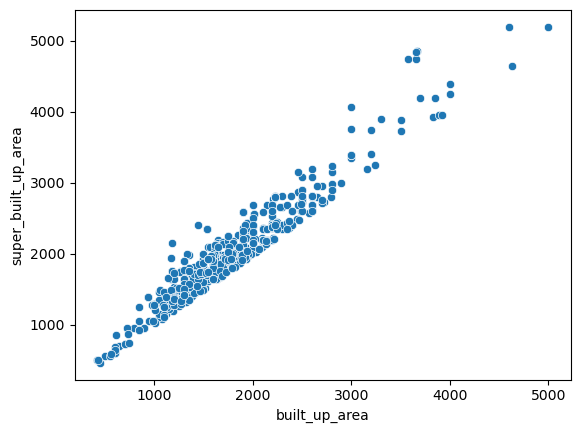

In [14]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

In [52]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [54]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [56]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [58]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [60]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_13124\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [62]:
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [64]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_13124\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [66]:
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [68]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_13124\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [70]:
df.update(sbc_df)

In [72]:
df.update(sb_df)

In [74]:
df.update(c_df)

In [80]:
df['built_up_area'].isnull().sum()

0

<Axes: xlabel='built_up_area', ylabel='price'>

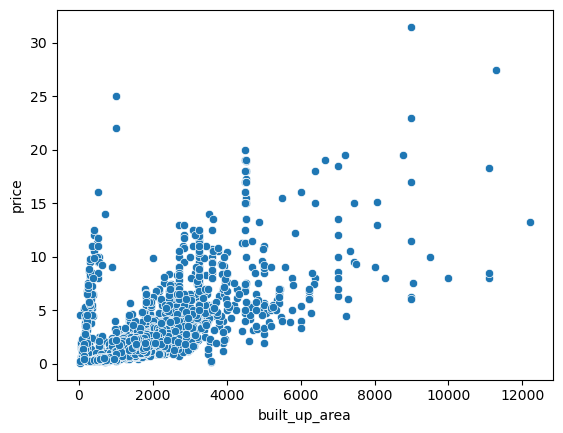

In [84]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [86]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [88]:
anamoly_df.sample(5)

,price,area,built_up_area
2502,3.3,1242.0,1242.0
3058,16.0,4235.0,500.0
1518,4.0,2164.0,1958.0
1834,3.5,1935.0,214.0
2987,3.0,1557.0,1557.0


In [90]:
anamoly_df['built_up_area']=anamoly_df['area']

In [92]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

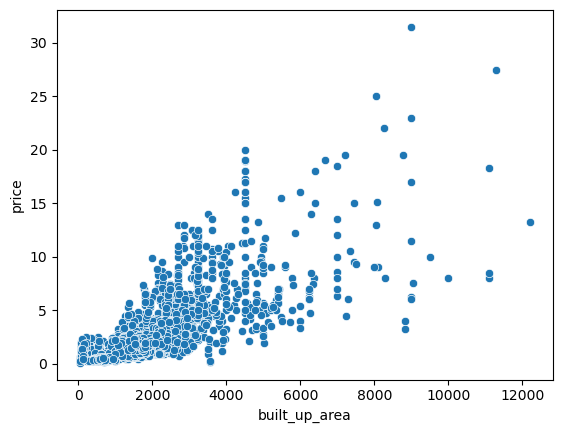

In [94]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [96]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [98]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ireo victory valley,sector 67,4.55,14537.0,4,4,3+,19.0,South,Relatively New,2833.0,0,1,0,0,0,0,156
1,flat,railway officers rpf society,sector 9a,1.25,6921.0,4,3,3,1.0,South-West,Old Property,2007.0,0,1,0,0,0,0,12
2,flat,global hill view,sector 11,0.36,5150.0,2,2,0,15.0,NaN,Undefined,699.0,0,0,0,0,0,2,0
3,house,independent,sector 57,8.31,24171.0,5,6,3+,4.0,North-East,Old Property,3438.0,1,1,1,1,0,2,34
4,flat,vatika lifestyle homes,sector 83,1.15,8214.0,3,3,1,7.0,South-West,Moderately Old,1607.0,0,0,0,0,0,0,95


In [100]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [102]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_13124\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [104]:
df['floorNum'].isnull().sum()

0

In [106]:
df.drop(columns=['facing'],inplace=True)

## agePossession

In [112]:
df[df['agePossession'] == 'Undefined'].head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,global hill view,sector 11,0.36,5150.0,2,2,0,15.0,Undefined,699.0,0,0,0,0,0,2,0
8,house,independent,sector 105,1.15,3285.0,3,2,1,1.0,Undefined,3889.0,0,0,0,0,0,2,0
12,house,independent,sector 14,4.60,20444.0,1,1,0,1.0,Undefined,2250.0,0,0,0,0,0,2,0
15,house,independent,sector 105,0.50,5556.0,2,2,0,1.0,Undefined,100.0,0,0,0,0,0,2,0
22,house,project housing board colony,sector 28,2.58,17695.0,4,2,2,2.0,Undefined,1458.0,0,0,0,0,0,2,0


In [114]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [116]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [118]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [120]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [122]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [124]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [128]:
df['agePossession'].value_counts()

agePossession
Relatively New        1711
Moderately Old         594
New Property           592
Old Property           319
Under Construction     280
Name: count, dtype: int64

In [130]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [132]:
df.shape

(3496, 18)